In [2]:
from datetime import date
import pandas as pd
import quandl
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras import layers, Sequential,models
import tensorflow as tf
import pickle
# %matplotlib notebook

In [3]:
with open("../data/result.pkl","rb") as f:
    data = pickle.load(f)
print(data)

{'(6, 4)': 1265.7230909167063, '(6, 5)': 1563.1206545671848, '(6, 6)': 1038.6919661716208, '(6, 7)': 1038.6919661716208, '(6, 8)': 1038.6919661716208, '(6, 9)': 1038.6919661716208, '(6, 10)': 1038.6919661716208, '(6, 11)': 1038.6919661716208, '(6, 12)': 1038.6919661716208, '(6, 13)': 1038.6919661716208, '(6, 14)': 1038.6919661716208, '(6, 15)': 1038.6919661716208, '(6, 16)': 1038.6919661716208, '(6, 17)': 1038.6919661716208, '(6, 18)': 1038.6919661716208, '(6, 19)': 1038.6919661716208, '(6, 20)': 1038.6919661716208, '(6, 21)': 1038.6919661716208, '(6, 22)': 1038.6919661716208, '(6, 23)': 1038.6919661716208, '(6, 24)': 1038.6919661716208, '(6, 25)': 1038.6919661716208, '(6, 26)': 1038.6919661716208, '(6, 27)': 1038.6919661716208, '(6, 28)': 1038.6919661716208, '(6, 29)': 1038.6919661716208, '(6, 30)': 1038.6919661716208, '(6, 31)': 1038.6919661716208, '(6, 32)': 1038.6919661716208, '(6, 33)': 1038.6919661716208, '(6, 34)': 1038.6919661716208, '(6, 35)': 1038.6919661716208, '(6, 36)': 10

In [8]:
z = list(data.values())
z_reverse = sorted(data.items(),key=lambda x:x[1],reverse=True)
z_sort  = sorted(data.items(),key=lambda x:x[1])

In [14]:
z_reverse

[('(15, 5)', 63281.97830713234),
 ('(16, 5)', 63281.97830713234),
 ('(17, 5)', 63281.97830713234),
 ('(24, 6)', 57870.80843585234),
 ('(24, 7)', 57870.80843585234),
 ('(24, 8)', 57870.80843585234),
 ('(24, 9)', 57870.80843585234),
 ('(24, 10)', 57870.80843585234),
 ('(24, 11)', 57870.80843585234),
 ('(24, 12)', 57870.80843585234),
 ('(24, 13)', 57870.80843585234),
 ('(24, 14)', 57870.80843585234),
 ('(24, 15)', 57870.80843585234),
 ('(24, 16)', 57870.80843585234),
 ('(24, 17)', 57870.80843585234),
 ('(24, 18)', 57870.80843585234),
 ('(24, 19)', 57870.80843585234),
 ('(24, 20)', 57870.80843585234),
 ('(24, 21)', 57870.80843585234),
 ('(24, 22)', 57870.80843585234),
 ('(24, 23)', 57870.80843585234),
 ('(24, 24)', 57870.80843585234),
 ('(24, 25)', 57870.80843585234),
 ('(24, 26)', 57870.80843585234),
 ('(24, 27)', 57870.80843585234),
 ('(24, 28)', 57870.80843585234),
 ('(24, 29)', 57870.80843585234),
 ('(24, 30)', 57870.80843585234),
 ('(24, 31)', 57870.80843585234),
 ('(24, 32)', 57870.8

In [11]:
print(f"min(z):{min(z)}")
print(f"max(z):{max(z)}")
print(f"sum(z)/9215:{sum(z)/9215}")

result = []
for i in [0.25,0.5,0.75,1]:
    result.append(z_sort[int(95*97*i)-1])
print(f"四分位点：{result}")

min(z):1000.0
max(z):63281.97830713234
sum(z)/9215:15459.902365621168
四分位点：[('(95, 28)', 1000.0), ('(49, 11)', 9407.730968218793), ('(13, 93)', 20467.642498422996), ('(17, 5)', 63281.97830713234)]


(95,)
(97,)
(95, 97)
(95, 97)
(95, 97)


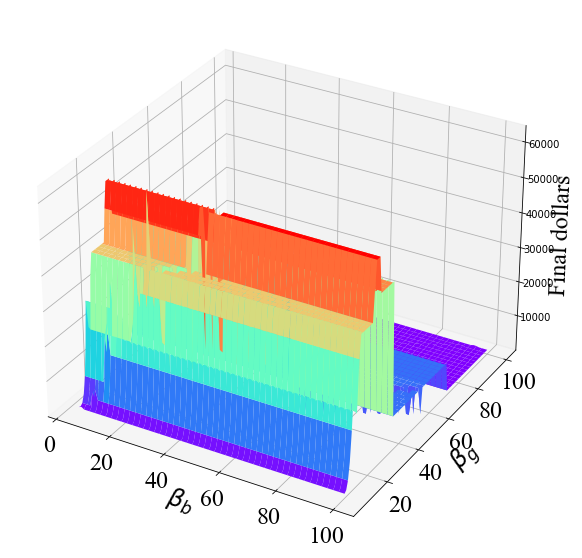

In [12]:
fig = plt.figure(figsize=(10,10))  #定义新的三维坐标轴
ax3 = plt.axes(projection='3d')

#定义三维数据
xx = np.arange(6,101)
yy = np.arange(4,101)
X, Y = np.meshgrid(yy,xx)
Z = []
for i in range(95):
    temp = []
    for j in range(97):
        temp.append(z[95*i+j])
    Z.append(temp)
Z = np.array(Z)
print(xx.shape)
print(yy.shape)
print(X.shape)
print(Y.shape)
print(Z.shape)
#作图
ax3.plot_surface(X,Y,Z,cmap='rainbow')
ax3.set_xlabel(r'$\beta_b$',fontdict={'family':'Times New Roman','size':24})
ax3.set_ylabel(r"$\beta_g$",fontdict={'family':'Times New Roman','size':24})
ax3.set_zlabel("Final dollars",fontdict={'family':'Times New Roman','size':24})

plt.xticks(fontproperties = 'Times New Roman', size = 24)
plt.yticks(fontproperties = 'Times New Roman', size = 24)

plt.savefig("../picture/决策模型阈值参数和最终收益关系.png")
plt.show()

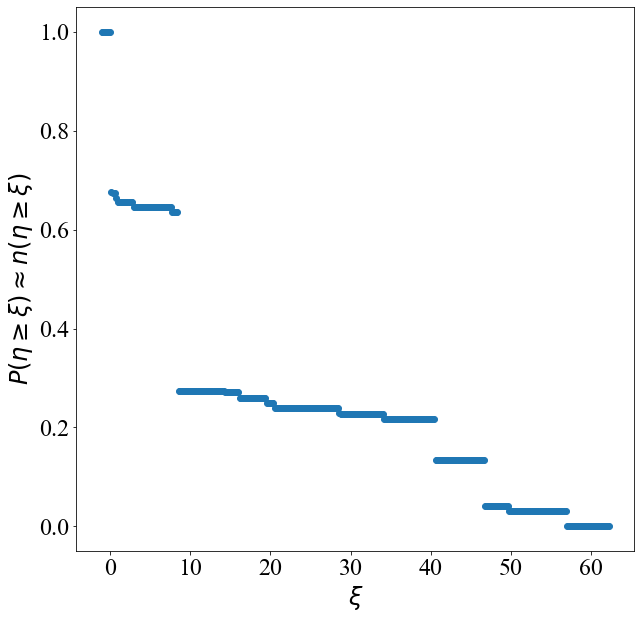

In [13]:
x = [(i/1000-1) for i in range(0,int(max(z))+1,200)]
y = []
temp = sorted(z,reverse=True)
for i in x:
    count = 0
    for j in temp:
        if j >= (i+1)*1000:
            count += 1
        else:
            break
    y.append(count/9215)
    
plt.figure(figsize=(10,10))
plt.scatter(x,y)
plt.xlabel(r"$\xi$",fontdict={'family':'Times New Roman','size':24})
plt.ylabel(r"$P(\eta\geq \xi)\approx n(\eta\geq\xi)$",fontdict={'family':'Times New Roman','size':24})
plt.xticks(fontproperties = 'Times New Roman', size = 24)
plt.yticks(fontproperties = 'Times New Roman', size = 24)
plt.savefig("../picture/收益率对应阈值参数的概率分布图.png")
plt.show()